# ÍNDICE

* **1 Introdução**
* **2 Coleta e descrição dos dados**
* **3 Amostragem**
* **4 Análise Exploratória dos Dados**
* **5 Modelagem**
* **6 Avaliação no conjunto de testes**
* **7 Conclusão**
* **Apêndice A**
* **Apêndice B**

# 1 Introdução

Este projeto tem como objetivo analisar um dataset de preços de casas da Califórnia, nos anos 1990, e apresentar um modelo de previsão para os valores médios das casas.  
Utilizou-se o cross_val_score e o cross_val_predict para obter os escores e as previsões.  
Além disso, ao final, construi-se uma função para fazer previsões (Apêndice A) e salvou-se os arquivos de transformação dos dados para pré-processamento e deployment.

# 2 Coleta de dados

In [1]:
#Para cálculos e dataframe
import pandas as pd
import numpy as np

#Para criação de gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

#Para obter uma amostra estratificada, baseada na coluna income_cat
from sklearn.model_selection import StratifiedShuffleSplit

#Para substituir os valores ausentes
from sklearn.impute import SimpleImputer

#para transformar variáveis categóricas em numéricas
from sklearn.preprocessing import OneHotEncoder

#PAra criar pipelines
from sklearn.pipeline import Pipeline

#Para criar pipelines de pré-processamento

from sklearn.compose import ColumnTransformer

#Para realizar validação cruzada

from sklearn.model_selection import cross_val_score

#Para normalizar os dados

from sklearn.preprocessing import StandardScaler

#Para buscar uma melhor avaliação do modelo

from sklearn.model_selection import GridSearchCV

#Para avaliar o erro 

from sklearn.metrics import mean_squared_error

Dados obtidos de: https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [2]:
data = pd.read_csv(r'C:\Users\Hermann\Desktop\DS\Projetos\Datasets\housing\housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# 3 Análise Exploratória dos Dados

## 3.1 Descrição dos dados

Primeiramente, vamos verificar os tipos de dados contidos em cada coluna.

In [4]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Vemos que nosso dataset é composto de 9 variáveis numéricas e 1 variável categórica.
Segue a descrição de cada coluna abaixo:

**Numéricas:**

* *longitude*: longitude da localização da região  
* *latitude*: latitude da localização da região  
* *housing_median_age*: idade média dos imóveis da região  
* *total_rooms*: quantidade total de cômodos na região  
* *total_bedrooms*: quantidade total de quartos na região  
* *population*: população da região  
* *households*: quantidade de domicílios na região  
* *median_income*: renda média na região  
* *median_house_value*: preço média da casa na região

**Categórica**

* *ocean_proximity*: proximidade do oceano


Vamos, então, utilizar o método `describe()` para obter informações básicas sobre o dataset.

In [5]:
data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


A coluna **ocean_proximity** possui 5 categorias. Vejamos quais são:

In [6]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Vejamos agora a quantidade de dados ausentes.

In [7]:
data.isnull().sum()/data.shape[0]*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

**Apenas 1% dos dados faltantes na coluna 'total_bedrooms'**

## 3.2 Relação entre as features e a variável target

### 3.2.1 Variável categórica

Primeiro vamos verificar de que forma os valores médios das casas variam em relação a cada categoria em **ocean_proximity**:

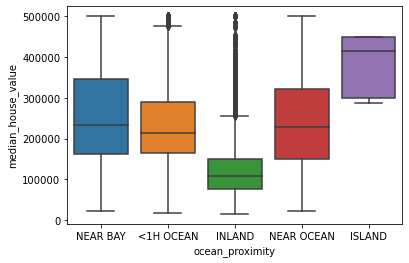

In [8]:
sns.boxplot(data = data, x = 'ocean_proximity', y='median_house_value')
plt.show()

**Embora a categoria ISLAND possua apenas 5 registros, ela apresenta o maior valor médio.**

Vamos visualizar a distribuição geográfica dos preços médio das casas.

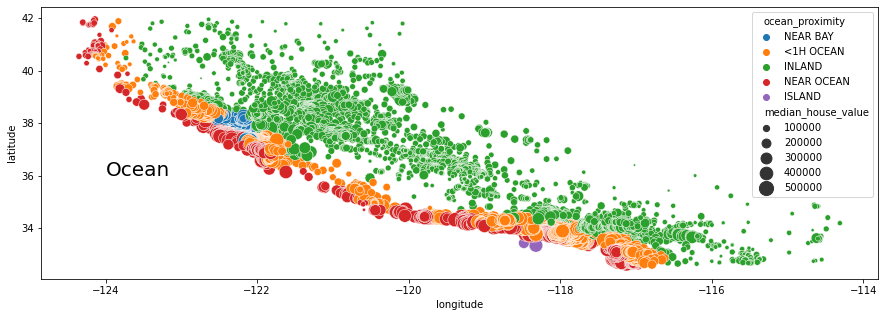

In [9]:
plt.subplots(figsize=(15,5))

sns.scatterplot(data=data, x='longitude', y='latitude', alpha=1,
                hue='ocean_proximity',
                size='median_house_value', sizes=(5,200),
              
               ).text(-124,36,'Ocean',fontsize=20)
plt.show()

A partir da visualização do gráfico da distribuição geográfica dos imóveis, podemos ver que os imóveis localizados mais próximos do oceano são os mais caros, confirmado pelo boxplot anterior, onde vemos que a média das casas 'NEAR OCEAN' é levemente mais alta que '<1H OCEAN'

## 3.2.2 Variáveis numéricas

Vamos primeiramente verificar de que forma as variáveis numéricas estão distribuidas:

In [10]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

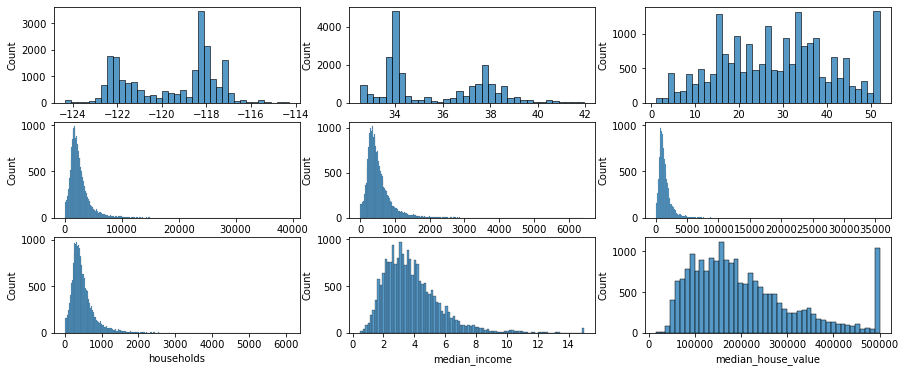

In [11]:
fig, ax = plt.subplots(3,3, figsize=(15,6))
sns.histplot(data['longitude'], ax=ax[0,0])
sns.histplot(data['latitude'], ax=ax[0,1])
sns.histplot(data['housing_median_age'], ax=ax[0,2])
sns.histplot(data['total_rooms'], ax=ax[1,0])
sns.histplot(data['total_bedrooms'], ax=ax[1,1])
sns.histplot(data['population'], ax=ax[1,2])
sns.histplot(data['households'], ax=ax[2,0])
sns.histplot(data['median_income'], ax=ax[2,1])
sns.histplot(data['median_house_value'], ax=ax[2,2])
plt.show()

Vamos verificar agora, de que forma as variáveis numéricas se relacionam com a variável target('median_house_value').

In [12]:
data.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Vemos que as colunas 'median_income', 'total_rooms', 'housing_median_age', 'households' e 'latitude', possuem a correlação linear mais forte. Vamos então ver de como elas se distribuem num gráfico de frequência, e sua relação com a variável target ('median_house_value').

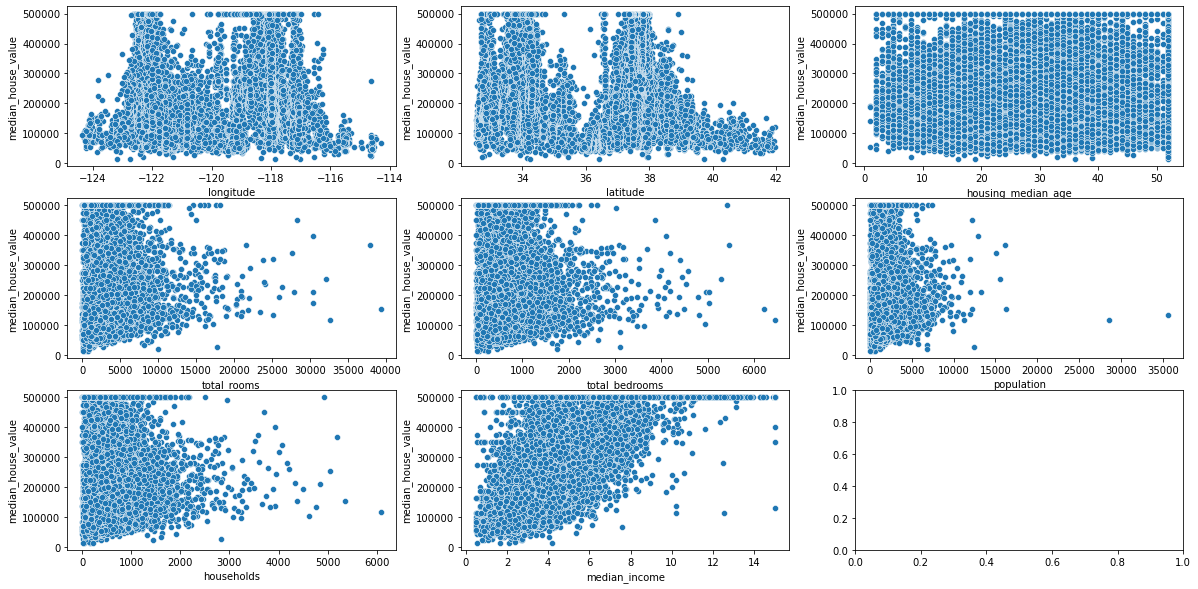

In [13]:
fig, ax = plt.subplots(3,3, figsize=(20,10))
sns.scatterplot(data=data, x='longitude', y='median_house_value', ax=ax[0,0])
sns.scatterplot(data=data, x='latitude', y='median_house_value',ax=ax[0,1])
sns.scatterplot(data=data, x='housing_median_age',y='median_house_value', ax=ax[0,2])
sns.scatterplot(data=data, x='total_rooms',y='median_house_value', ax=ax[1,0])
sns.scatterplot(data=data, x='total_bedrooms', y='median_house_value',ax=ax[1,1])
sns.scatterplot(data=data, x='population',y='median_house_value', ax=ax[1,2])
sns.scatterplot(data=data, x='households',y='median_house_value', ax=ax[2,0])
sns.scatterplot(data=data, x='median_income',y='median_house_value', ax=ax[2,1])
plt.show()

Das duas observações acima, distribuição e correlação linear com a variável target, podemos constatar que a coluna **median_income** possui uma alta correlação linear com com **median_house_value** e que , graficamente, **house_median_age** possui baixa correlação.

# 4 Amostragem estratificada

De posse dessas informações, especialmente a alta correlação com **median_income** vamos realizar uma amostragem estratificada, baseada nesse atributo. Primeiramente, vamos categorizar os valores para a renda média (median_income).

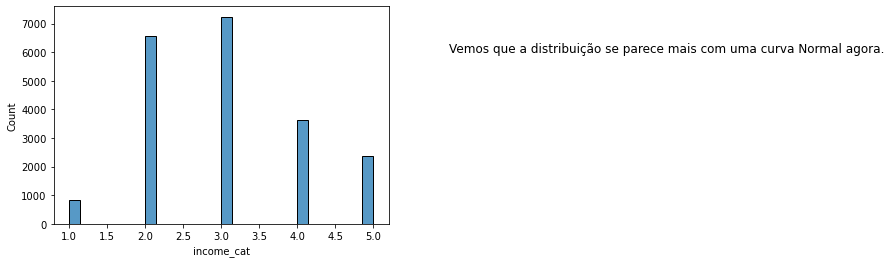

In [14]:
# 1 - Cria-se uma nova coluna que conterá a categoria de cada renda média (divide-se por 1.5 para reduzir o número de categorias)
data['income_cat'] = np.ceil(data['median_income']/1.5)
# 2 - Vamos criar apenas 5 categorias
data['income_cat'] = data['income_cat'].where(data['income_cat']<5, 5.0)
# 3 - Vamos visualizar o resultado da distribuição da nova coluna
sns.histplot(data=data, x = 'income_cat')

plt.text(6, 6000, 'Vemos que a distribuição se parece mais com uma curva Normal agora.', fontsize=12)
plt.show()

Vamos realizar o split, baseado na coluna 'income_cat', e em seguida, apagá-la.

In [15]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["income_cat"]):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]
    
print(f'Dados de treino:{train_set.shape}')
print(f'Dados de teste:{test_set.shape}')

Dados de treino:(16512, 11)
Dados de teste:(4128, 11)


In [16]:
train_set.drop(columns=['income_cat'], inplace = True)
test_set.drop(columns=['income_cat'], inplace = True)

# 5 Pré-processamento dos dados

Apenas para mostrar os procedimentos que serão realizados, vamos mostrar todas as etapas que serão feitas no pré-processamento.
Em seguida, construiremos o Pipeline que será usado no pré-processamento.

*obs: embora não fosse necessário fazer a normalização dos dados, optei por fazê-lo mesmo assim, pois estava treinando Pipelines.

In [17]:
#Lista de variáveis numéricas
num_var = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
num_var

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [18]:
#lista de variáveis categóricas
cat_var = ['ocean_proximity']
cat_var


['ocean_proximity']

In [19]:
target = ['median_house_value']
target

['median_house_value']

## 5.1 Variáveis numéricas

Vamos primeiramente substituir os missing values nas variáveis numéricas, pelo valor da média. Neste caso, temos apenas  na coluna 'total_bedrooms'.

In [20]:
imputer = SimpleImputer(strategy='median')

In [21]:
train_set_num = imputer.fit_transform(train_set[num_var])

In [22]:
train_set_num = pd.DataFrame(train_set_num, columns = num_var)
train_set_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [23]:
train_set_target = pd.DataFrame(train_set[target]).reset_index()
train_set_target

,index,median_house_value
0,12655,72100.0
1,15502,279600.0
2,2908,82700.0
3,14053,112500.0
4,20496,238300.0
...,...,...
16507,15174,268500.0
16508,12661,90400.0
16509,19263,140400.0
16510,19140,258100.0


## 3.2 Variáveis categóricas

Vamos transformar a coluna de variáveis categóricas, usando o One Hot Encodder:

In [24]:
encoder = OneHotEncoder()

In [25]:
train_set_cat = encoder.fit_transform(train_set[cat_var])

In [26]:
train_set_cat = pd.DataFrame(train_set_cat.toarray(), columns=encoder.categories_[0].tolist())
train_set_cat

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
16507,1.0,0.0,0.0,0.0,0.0
16508,0.0,1.0,0.0,0.0,0.0
16509,1.0,0.0,0.0,0.0,0.0
16510,1.0,0.0,0.0,0.0,0.0


## 3.3 DataFrame preparado

Finalmente, podemos ver abaixo, como será o DataFrame o qual iremos trabalhar, excluindo a coluna 'median_house_value'.

In [27]:
train_set_prep = pd.concat([train_set_num,train_set_cat, train_set_target], axis=1)
train_set_prep

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,index,median_house_value
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,0.0,1.0,0.0,0.0,0.0,12655,72100.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,0.0,0.0,0.0,0.0,1.0,15502,279600.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,0.0,1.0,0.0,0.0,0.0,2908,82700.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,0.0,0.0,0.0,0.0,1.0,14053,112500.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.0,0.0,0.0,0.0,0.0,20496,238300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.0,0.0,0.0,0.0,0.0,15174,268500.0
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,0.0,1.0,0.0,0.0,0.0,12661,90400.0
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,1.0,0.0,0.0,0.0,0.0,19263,140400.0
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.0,0.0,0.0,0.0,0.0,19140,258100.0


# 5 Modelagem

## 5.1 Preparação dos dados

Vamos realizar novamente o pré-tratamento dos dados, criando um Pipeline.

In [28]:
X_train = train_set.drop(columns=['median_house_value'])
y_train = train_set['median_house_value']

E fazer as transformações necessárias, as mesmas que foram feitas anteriormente, através do ColumnTransformer.

In [29]:
#Para as variáveis numéricas:

num_var = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
num_transf = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#Para as variáveis categóricas:

cat_var = ['ocean_proximity']
cat_transf = Pipeline([
    ('encoder', OneHotEncoder())
])

In [30]:
#Pipeline de pré-processamento:

preprocessor = ColumnTransformer([
    ('num', num_transf, num_var),
    ('cat', cat_transf, cat_var)
])

In [31]:
X_train = preprocessor.fit_transform(X_train)

In [32]:
X_train[0:1]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ]])

## 5.2 Regressão Linear

In [33]:
from sklearn.linear_model import LinearRegression

Vamos realizar validação cruzada na Regressão Linear:

In [34]:
lin_scores = cross_val_score(LinearRegression(), X_train, y_train, scoring='neg_mean_squared_error', cv=10 )
lin_scores_rmse = np.sqrt(-lin_scores)

In [35]:
print(f'O RMSE é igual a {lin_scores_rmse.mean():.7}')

O RMSE é igual a 69204.32


## 5.3 Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
dtr = DecisionTreeRegressor()

Vamos realizar a validação cruzada na Decision Tree Regressor:

In [38]:
dtr_scores = cross_val_score(dtr, X_train,y_train, scoring='neg_mean_squared_error', cv=10)

In [39]:
print(f'O RMSE é igual a {np.sqrt(-dtr_scores.mean()):.7}')

O RMSE é igual a 69156.17


## 5.4 Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rfr = RandomForestRegressor()
rfr_scores = cross_val_score(rfr, X_train,y_train, scoring='neg_mean_squared_error', cv=10)

In [42]:
print(f'O RMSE é igual a {np.sqrt(-rfr_scores.mean()):.7}')

O RMSE é igual a 49364.21


# 6 Avaliação no conjunto de testes

## 6.1 Pré-processamento

In [43]:
X_test = train_set.drop(columns=['median_house_value'])
y_test = train_set['median_house_value']

In [44]:
X_test = preprocessor.transform(X_test)
X_test[0:1]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ]])

## 6.3 Avaliação do modelo

Vamos agora avaliar o erro RMSE:

In [45]:
from sklearn.model_selection import cross_val_predict

In [46]:
y_pred = cross_val_predict(rfr, X_test,y_test, cv=10)

In [47]:
RMSE = mean_squared_error(y_test,y_pred, squared=False)
print(f'O erro RMSE é de {RMSE:.7}')

O erro RMSE é de 49432.55


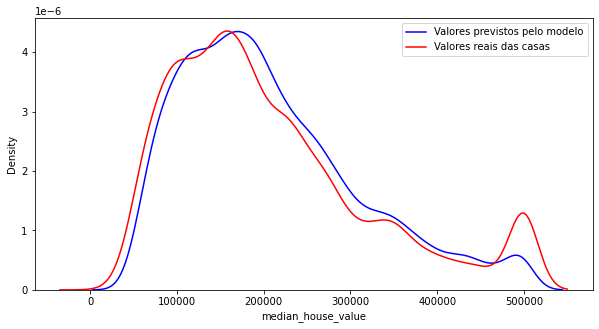

In [48]:
plt.subplots(figsize=(10,5))
sns.kdeplot(y_pred, color='blue')
sns.kdeplot(y_test, color='red')
plt.legend(['Valores previstos pelo modelo','Valores reais das casas'])
plt.show()

Percebemos que o modelo apresenta os maiores erros entre os valores de 200000 e 300000.

# 6 Conclusão

O RMSE obtido para os 3 modelos (com os conjuntos de treino) Regressão Linear, Decision Tree Regressor e Randon Forest Regressor, é:

In [49]:
pd.DataFrame([{'Regressão Linear':lin_scores_rmse.mean(), 
               'Decision Tree Regressor':np.sqrt(-dtr_scores.mean() ), 
               'Randon Forest Regressor':np.sqrt(-rfr_scores.mean() )
              }], index=['RMSE'])

,Regressão Linear,Decision Tree Regressor,Randon Forest Regressor
RMSE,69204.322755,69156.174006,49364.212744


O modelo que apresentou o melhor resultado foi o Randon Forest Regressor.
Vemos que ele apresenta os erros entre os valores de 200000 e 300000, além de não conseguir prever bem os erros para as casas que apresentam os maiores valores.

# Apêndice A

Construiremos uma função para prever o valor do imóvel a partir das entradas:

In [50]:
def predizer_valor():
    
    longitude = input('Digite a longitude: ')
    latitude = input('Digite a latitude: ')
    housing_median_age = input('Digite a housing_median_age: ')
    total_rooms = input('Digite a total_rooms: ')
    total_bedrooms = input('Digite a total_bedrooms: ')
    population = input('Digite a população: ')
    households = input('Digite a households: ')
    median_income = input('Digite a median_income: ')
    ocean_proximity = input('Digite a ocean_proximity:')
    
    casa = pd.DataFrame({'longitude':[longitude], 'latitude':[latitude], 'housing_median_age':[housing_median_age], 
                     'total_rooms':[total_rooms],'total_bedrooms':[total_bedrooms], 'population':[population],
                     'households':[households], 'median_income':[median_income], 'ocean_proximity':[ocean_proximity] })
    
    x_casa = preprocessor.transform(casa)
    
    return print(f'O valor da casa é de: {cross_val_predict(rfr, X_test,y_test, cv=10)[0]}')
    

# Apêndice B

Vamos preparar os arquivos para deployment:

In [52]:
import joblib

Primeiramente a transformação do pré-processamento, dessa vez aplicada a todo o dataset:

In [53]:
X = data.drop(columns=['median_house_value'])

In [54]:
#recordando as variáveis numéricas
num_var

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [55]:
#recordando as variáveis categóricas
cat_var

['ocean_proximity']

In [56]:
preparacao = preprocessor.fit(X)

In [57]:
transformacao = joblib.dump(preparacao,'transformacao.pkl')

Vamos agora realizar o ajuste para o conjunto total de dados:

In [61]:
X_transform = preparacao.transform(X)

In [62]:
rfr.fit(X_transform,data['median_house_value'])

RandomForestRegressor()

In [64]:
joblib.dump(rfr,'rfr.pkl')

['rfr.pkl']